**Before starting:**

You need to install Basemap. Do it only once.

In [5]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Goal of this practice:**

The goal is to use Google Colab and to manipulate a small dataset of satellite data (230Mo). Today, we won't be using any big data tools or Google Cloud Platform.

**Import libraries:**

- matplotlib (2D plotting)
- pylab (scientific computing)
- basemap (plotting 2D data on maps)
- pandas (data structures and data analysis tools)

In [6]:
%matplotlib inline
%pylab inline
from mpl_toolkits.basemap import Basemap
import pandas as pd
import warnings
warnings.filterwarnings("ignore") # disable warnings
pylab.rcParams['figure.figsize']=(15,15) # graph size

Populating the interactive namespace from numpy and matplotlib


**Declare functions:**
- plot_im (plot satellite image with geographic coordinates)
- plot_ts (plot time series)

In [7]:
# function to plot images  
def plot_im(lon,lat,im,size_points,var_name):
    
    # transform to arrays (just in case)
    lon=array(lon)
    lat=array(lat)
    im=array(im)
    
    if max(lon)-min(lon)<100:
      # Mercator projection (for small zone)
      m=Basemap(projection='merc',llcrnrlat=nanmin(lat),urcrnrlat=nanmax(lat),\
                llcrnrlon=nanmin(lon),urcrnrlon=nanmax(lon),lat_0=(nanmax(lat)+nanmin(lat))*0.5,\
                lon_0=(nanmax(lon)+nanmin(lon))*0.5,resolution='l')
    else:
      # Orthogonal projection (for large zone)
      m=Basemap(projection='ortho',lat_0=0,lon_0=0,resolution='l')
    # you can use other projections (see https://matplotlib.org/basemap/users/mapsetup.html)
    
    # transform (lon,lat) to (x,y)
    x,y=m(lon,lat)

    # plot
    im=ma.masked_where(isnan(im),im)
    res=m.scatter(x,y,size_points,im,'o',alpha=1,cmap='jet',lw=0)
    m.drawcoastlines()
    m.fillcontinents()
    parallels = linspace(nanmin(lat),nanmax(lat),15)
    meridians = linspace(nanmin(lon),nanmax(lon),15)
    #m.drawparallels(parallels,labels=[1,0,0,1],fontsize=10)
    #m.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)
    cb=m.colorbar(res,location="right")
    cb.set_label(var_name,fontsize=15)
    
# function to plot time series
def plot_ts(time,ts,line_type,var_name):

    # plot
    plot_date(time,ts,line_type)
    xlabel('Time',fontsize=15)
    ylabel(var_name,fontsize=15)

**First practice:**

In this practice, we manipulate satellite observations of the global ocean. We use daily data with 25km spatial resolution. We study the Sea Surface Temperature (SST, in degrees) and the Sea Surface Height (SSH, in meters). SST and SSH are indexed in space (lon, lat) and time.

Here, we work on a small part of the database (only 10 days in 2015, 230Mo) and we will try to perform some basic statistics. The idea is to show that even if you use a small sample, basic data manipulation without big data tools is difficult, time and ressource consuming.

**Part 1)**

After copying the dataset "data_sst_ssh_2015_small.csv" on your Colab environment, we read it using pandas (easy-to-use data structures and data analysis tools). We use the *groupby* and *mean* pandas functions to: map the global SST and SSH (using *plot_im*), plot the mean SST and SSH time series (using *plot_ts*).

The dataset is available here: https://drive.google.com/open?id=1px9O92xVjhZXCdUGHpTsjY6g1pVTZEcz.

In [8]:
# read dataframe
data = pd.read_csv('drive/MyDrive/BigData/01_10/data_sst_ssh_2015_small.csv', header=None, names=['lat', 'lon', 'sst', 'time', 'ssh'])

In [9]:
# sample of the dataset
data

,lat,lon,sst,time,ssh
0,-77.625,322.625,-1.8,735600.0,-1.2535
1,-77.375,319.625,-1.8,735600.0,-1.2179
2,-77.375,319.875,-1.8,735600.0,-1.2214
3,-77.375,320.125,-1.8,735600.0,-1.2247
4,-77.375,320.375,-1.8,735600.0,-1.2285
...,...,...,...,...,...
5338138,81.875,29.375,-1.8,735609.0,-0.3426
5338139,81.875,29.625,-1.8,735609.0,-0.3394
5338140,81.875,29.875,-1.8,735609.0,-0.3377
5338141,81.875,30.125,-1.8,735609.0,-0.3370


In [10]:
# statistics of the dataset
data.describe()

,lat,lon,sst,time,ssh
count,5.338143e+06,5.338143e+06,5.338143e+06,5.338143e+06,5.338142e+06
mean,-1.140247e+01,1.932643e+02,1.646710e+01,7.356045e+05,3.436659e-01
std,3.845651e+01,1.003294e+02,1.041889e+01,2.871929e+00,7.254869e-01
min,-7.762500e+01,1.250000e-01,-1.800000e+00,7.356000e+05,-1.520300e+00
25%,-4.462500e+01,1.123750e+02,6.450000e+00,7.356020e+05,-3.170000e-02
50%,-1.587500e+01,1.971250e+02,1.950000e+01,7.356050e+05,5.697000e-01
75%,1.737500e+01,2.733750e+02,2.595000e+01,7.356070e+05,8.530000e-01
max,8.437500e+01,3.598750e+02,3.345000e+01,7.356090e+05,1.898000e+00


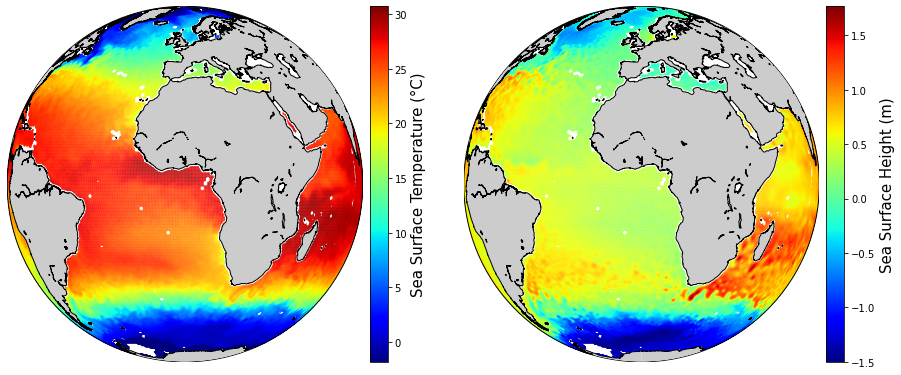

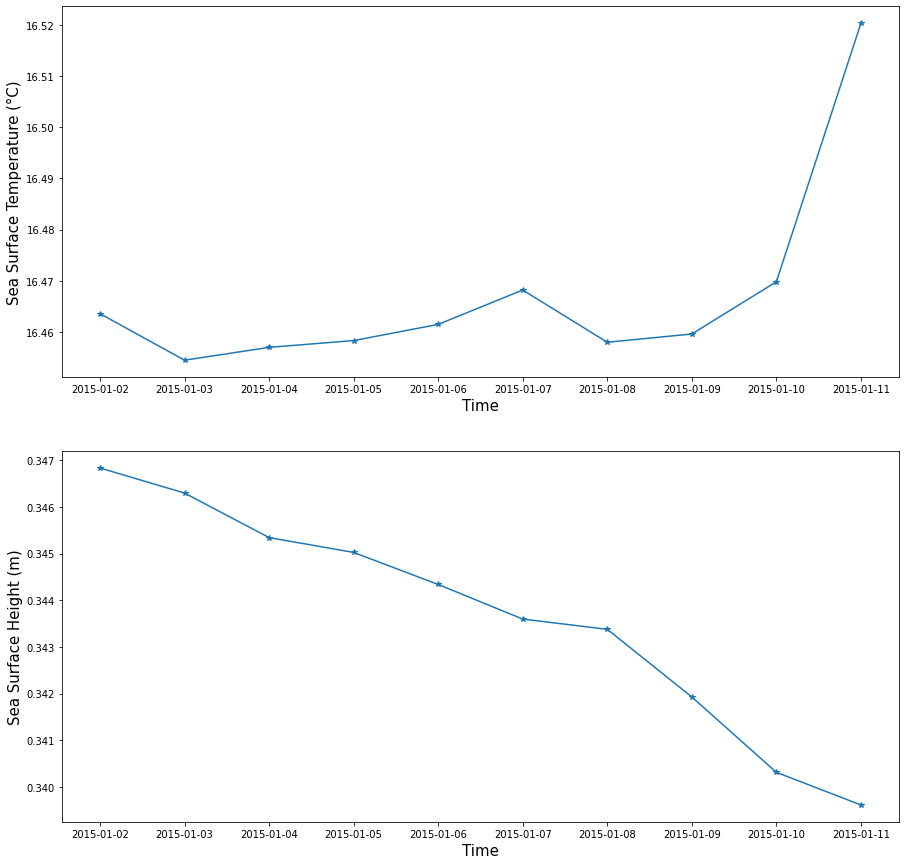

In [11]:
# plot global SST and SSH maps
sst_im=data.groupby(['lon','lat'])['sst'].mean()
ssh_im=data.groupby(['lon','lat'])['ssh'].mean()
lon_im=data.groupby(['lon','lat'])['lon'].mean()
lat_im=data.groupby(['lon','lat'])['lat'].mean()
figure()
subplot(1,2,1)
plot_im(lon_im,lat_im,sst_im,1,'Sea Surface Temperature (°C)')
subplot(1,2,2)
plot_im(lon_im,lat_im,ssh_im,1,'Sea Surface Height (m)')

# plot global SST and SSH time series
sst_ts=data.groupby(['time'])['sst'].mean()
ssh_ts=data.groupby(['time'])['ssh'].mean()
time_ts=data.groupby(['time'])['time'].mean()
figure()
subplot(2,1,1)
plot_ts(time_ts,sst_ts,'-*','Sea Surface Temperature (°C)')
subplot(2,1,2)
plot_ts(time_ts,ssh_ts,'-*','Sea Surface Height (m)')

**Part 2)**

Now, we consider only a small region of the Globe: the Mediterranean Sea. As previously, we plot the mean time series and maps of SST and SSH. We also plot the SSH as a function of SST and the 2 distributions using histograms.

Text(0, 0.5, 'Sea Surface Height (m)')

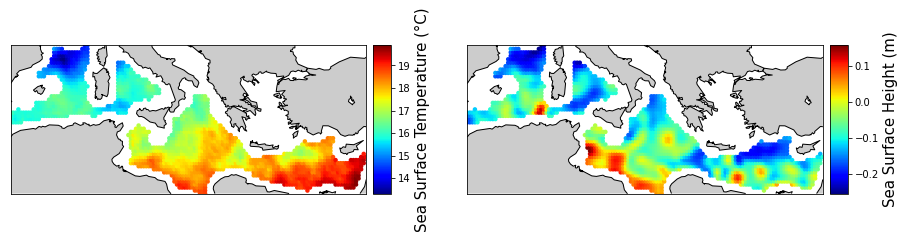

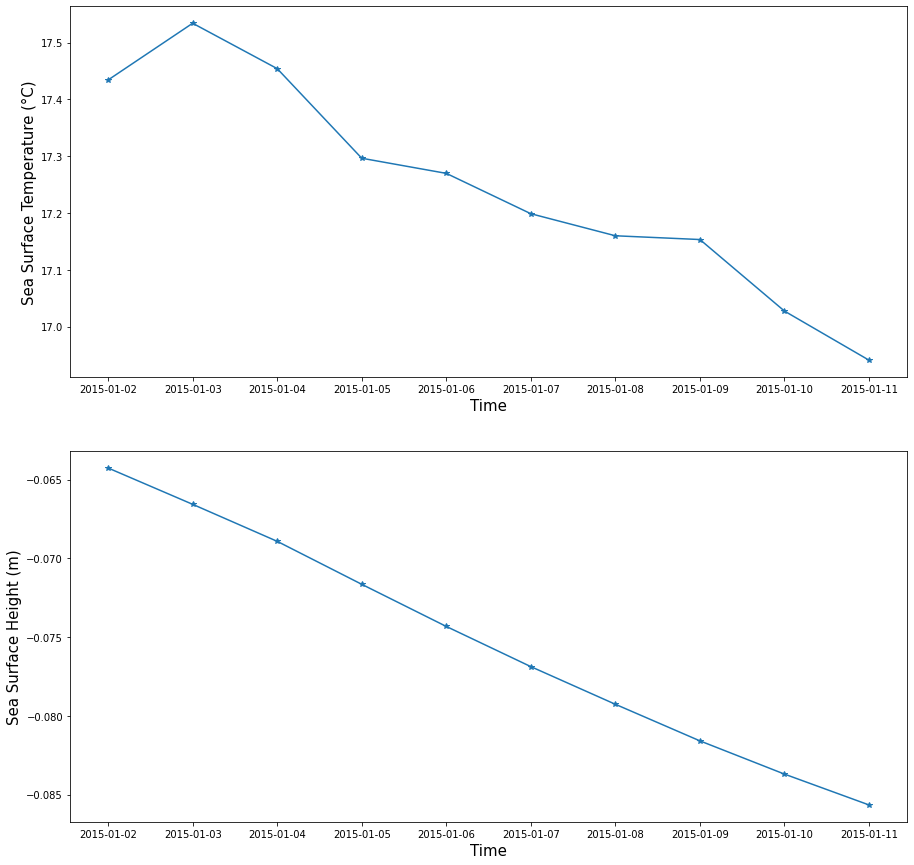

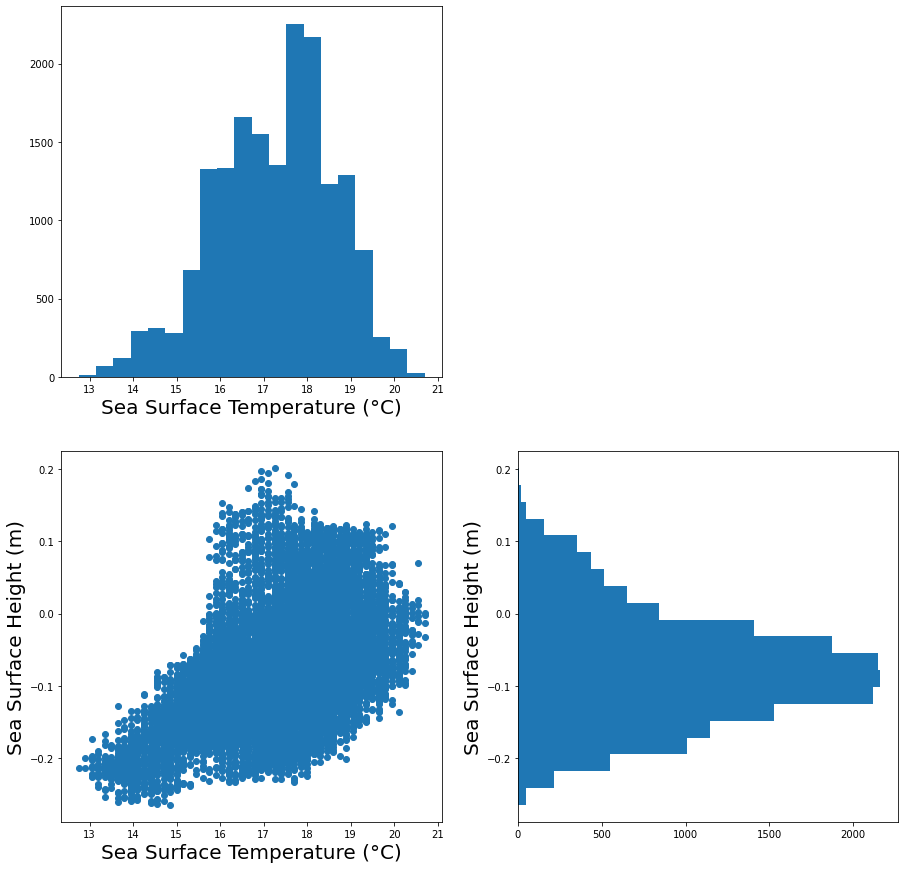

In [12]:
# data selection
data_med=data[(data.lon>0) & (data.lon<35) & (data.lat>30) & (data.lat<45)]

# plot SST and SSH maps
sst_med_im=data_med.groupby(['lon','lat'])['sst'].mean()
ssh_med_im=data_med.groupby(['lon','lat'])['ssh'].mean()
lon_med_im=data_med.groupby(['lon','lat'])['lon'].mean()
lat_med_im=data_med.groupby(['lon','lat'])['lat'].mean()
figure()
subplot(1,2,1)
plot_im(lon_med_im,lat_med_im,sst_med_im,20,'Sea Surface Temperature (°C)')
subplot(1,2,2)
plot_im(lon_med_im,lat_med_im,ssh_med_im,20,'Sea Surface Height (m)')

# plot SST and SSH time series
sst_med_ts=data_med.groupby(['time'])['sst'].mean()
ssh_med_ts=data_med.groupby(['time'])['ssh'].mean()
time_med_ts=data_med.groupby(['time'])['time'].mean()
figure()
subplot(2,1,1)
plot_ts(time_med_ts,sst_med_ts,'-*','Sea Surface Temperature (°C)')
subplot(2,1,2)
plot_ts(time_med_ts,ssh_med_ts,'-*','Sea Surface Height (m)')

# plot hist(SST), hist(SSH), SSH~SST
figure()
subplot(2,2,1)
hist(data_med.sst, 20)
xlabel('Sea Surface Temperature (°C)', size=20)
subplot(2,2,4)
hist(data_med.ssh, 20, orientation='horizontal')
ylabel('Sea Surface Height (m)', size=20)
subplot(2,2,3)
scatter(data_med.sst, data_med.ssh)
xlabel('Sea Surface Temperature (°C)', size=20)
ylabel('Sea Surface Height (m)', size=20)

**Part 3)**

Now, you can play with the data and plot these different graphs:
- SST as a function of the latitude
- SST and SSH correlation (e.g., using hist2d function)

You can also have a look at a specific region.

In [13]:
# function to plot lat series
def plot_ls(x,y,line_type, x_name, y_name):

    # plot
    plot(x,y,line_type)
    xlabel(x_name,fontsize=15)
    ylabel(y_name,fontsize=15)

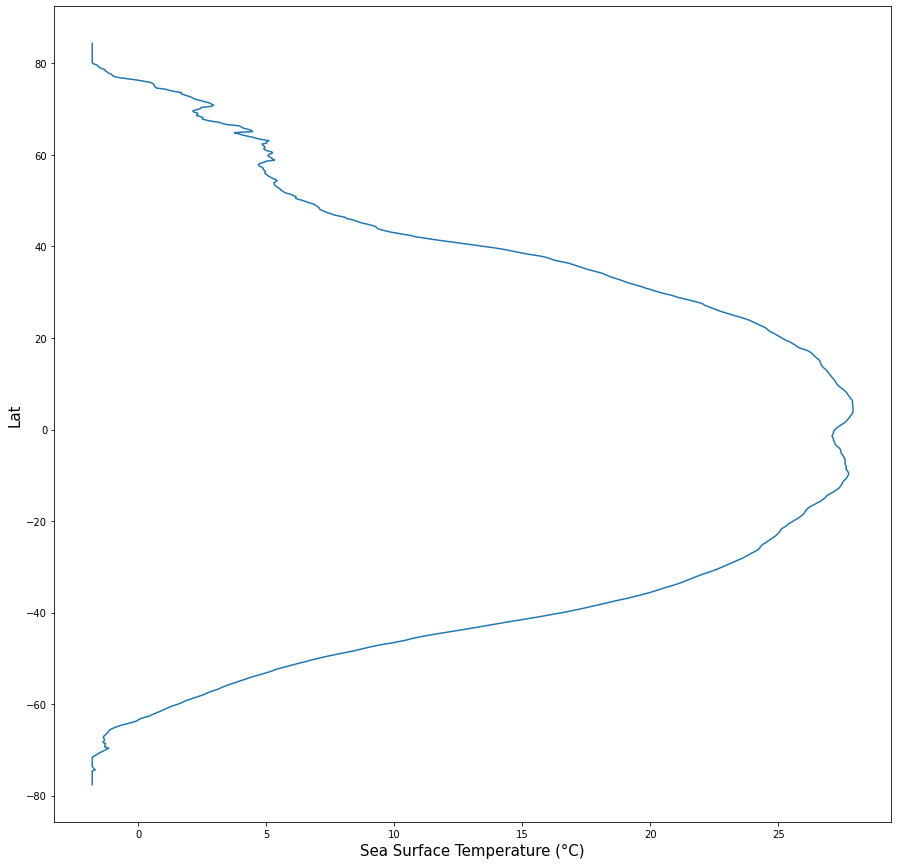

In [14]:
# plot global SST and SSH latitude series
sst_lats=data.groupby(['lat'])['sst'].mean()
ssh_lats=data.groupby(['lat'])['ssh'].mean()
lat_lats=data.groupby(['lat'])['lat'].mean()
figure()
# subplot(2,1,1)
plot_ls(sst_lats,lat_lats,'-','Sea Surface Temperature (°C)','Lat')
# subplot(2,1,2)
# plot_ls(ssh_lats,lat_lats,'-','Sea Surface Height (m)','Lat')

In [15]:
cov(sst_med_ts, ssh_med_ts)

array([[3.60017199e-02, 1.34731829e-03],
       [1.34731829e-03, 5.43084984e-05]])

Text(0, 0.5, 'Sea Surface Height (m)')

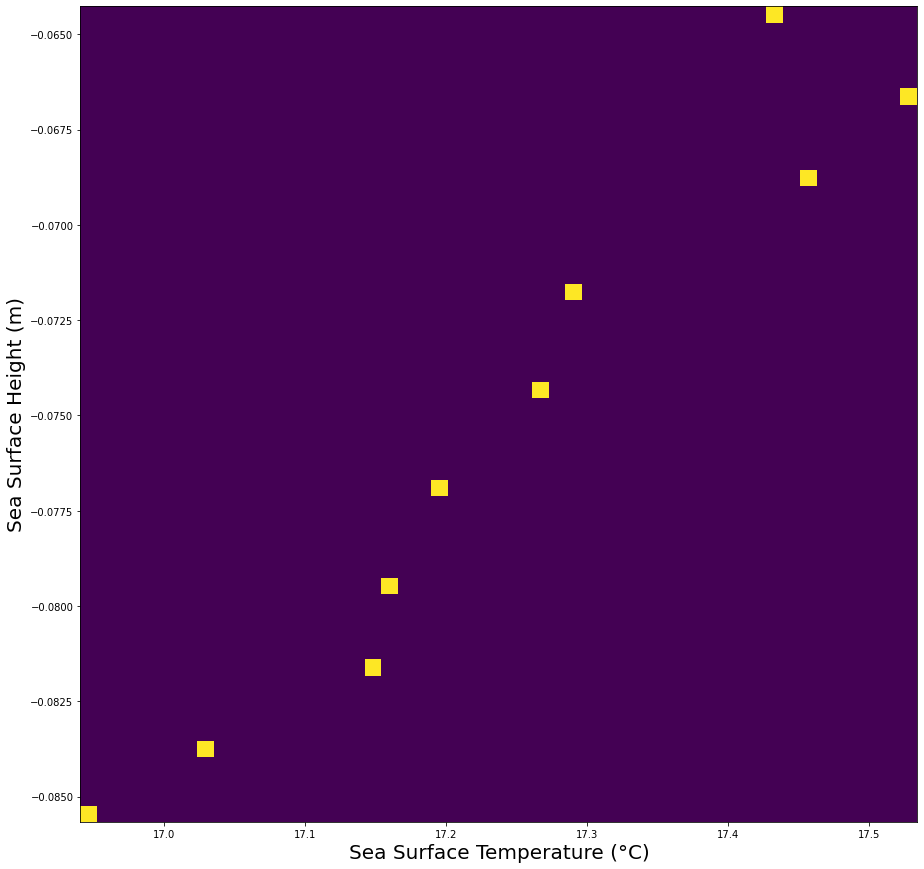

In [16]:
hist2d(sst_med_ts,ssh_med_ts,50)
xlabel('Sea Surface Temperature (°C)', size=20)
ylabel('Sea Surface Height (m)', size=20)

**Remark:**

The dataset used above is small (250Mo) and corresponds only to 10 days. Now, we want to manipulate the full database of 18 years (1998-2015, 175Go) using big data tools. The manipulation of the full dataset is not possible on this Colab environment. We need to connect to the Google Cloud Platform.